# Wilson's Morning Wake Up Playlist Generator, Exploratory Data Analysis

This notebook is broken down into the following tasks:

* Querying the Spotify API for Wilson Morning Wake Up tracks
* Taking a look at the overall descriptive statistics of the dataset
* Distribution analysis of candidate features 

In the _next_ notebook, Feature_Engineering, we will use the features and `.csv` files created in _this_ notebook to conduct data preprocessing and feature engineering activities.

In [1]:
# EDA Tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Spotify API
import spotipy
import spotipy.util as util

# Defaults
import os
import sys

In [3]:
# Spotify for developers client auth variables
username = os.environ['SPOTIFY_EMAIL']
spotify_id = os.environ['SPOTIFY_ID']
spotify_secret = os.environ['SPOTIFY_SECRET']

# Set API scope
scope='playlist-read-private'

# Get auth token
token = util.prompt_for_user_token(username, 
                                   scope,
                                   client_id=spotify_id,
                                   client_secret=spotify_secret,
                                   redirect_uri='http://localhost/')

In [4]:
# Gather tracks from all the Wilson's Morning Wake Up volumes
songs_df = pd.DataFrame()

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print("Usage: %s username" % (sys.argv[0],))
    sys.exit()

if token:
    sp = spotipy.Spotify(auth=token)
    playlists = sp.current_user_playlists(limit=50)

print("Gathering Wilson's Morning Wake Ups")
print('-'*30)
while playlists:

    for i, playlist in enumerate(playlists['items']):
        if 'Morning Wake Up Vol.' in playlist['name']:
            
            print("%4d %s %s" % (playlists['offset'], playlist['uri'],  playlist['name']))
            
            tracks = sp.playlist_tracks(playlist['uri'])
            current_volume = playlist['name'].split('.')[1]
            for j, track in enumerate(tracks['items']):
                track_data={}
                track_data['volume'] = current_volume
                track_data['position'] = j + 1
                track_data['track_name'] = track['track']['name']
                track_data['artist_name'] = track['track']['artists'][0]['name']
                track_features = sp.audio_features(track['track']['id'])[0]
                track_data.update(track_features)
                test = pd.DataFrame(track_data, index=[0])
                songs_df = songs_df.append(test, ignore_index=True)
                
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None
else:
    print("Can't get token for", username)
    
# Save data
songs_df.to_csv("data/wmw_tracks.csv", index=False)

Gathering Wilson's Morning Wake Ups
------------------------------
   0 spotify:playlist:29QUrMzNAFJT77380jtpOA Wilson's Morning Wake Up Vol.38
   0 spotify:playlist:1HUz7ca3ECqfJ9suFXZcxk Wilson's Morning Wake Up Vol.37
   0 spotify:playlist:0f2NE2qcrMW4un3lJa5zDD Wilson's Morning Wake Up Vol.36
   0 spotify:playlist:6cslrzQA3kBFU0sok2w8j3 Wilson's Morning Wake Up Vol.35
   0 spotify:playlist:2kntKI1ugv0yPE29ZvzOq3 Wilson's Morning Wake Up Vol.34
   0 spotify:playlist:4GGzF2m3PwzRK8GsHBkDlk Wilson's Morning Wake Up Vol.33
   0 spotify:playlist:7acxkZJMDrYGyZM60p88Az Wilson's Morning Wake Up Vol.32
   0 spotify:playlist:4QUohF0YREtlpEh5ECOzE5 Wilson's Morning Wake Up Vol.31
   0 spotify:playlist:5A1Qv5IIJuzLVXV3dWHhQf Wilson's Morning Wake Up Vol.30
   0 spotify:playlist:3mFgOnWDpuBKTOhePQF5aG Wilson's Morning Wake Up Vol.29
   0 spotify:playlist:5kCRkjrwuUhfKiPhBGAwny Wilson's Morning Wake Up Vol.28
   0 spotify:playlist:7kLEdmHLe3gnLCxewQXvXi Wilson's Morning Wake Up Vol.27
   0 spot

In [7]:
# Filename
csv_file = 'data/wmw_tracks.csv'

# Read csv
songs_df = pd.read_csv(csv_file, index_col=False)

# Print out some data
print('Data shape (rows, cols): ', songs_df.shape)
print()
songs_df.head()

Data shape (rows, cols):  (554, 22)



,volume,position,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,38,1,Finding It There,Goldmund,0.187,0.00257,1,-37.134,1,0.0427,...,0.0915,0.0374,123.707,audio_features,6CnPCuUcM3A5PMP4gUy0vw,spotify:track:6CnPCuUcM3A5PMP4gUy0vw,https://api.spotify.com/v1/tracks/6CnPCuUcM3A5...,https://api.spotify.com/v1/audio-analysis/6CnP...,220120,5
1,38,2,Light Forms,Rohne,0.671,0.54500,10,-12.848,0,0.0393,...,0.1180,0.2840,133.036,audio_features,6MkUPsz5hYeneo0a9H0VT8,spotify:track:6MkUPsz5hYeneo0a9H0VT8,https://api.spotify.com/v1/tracks/6MkUPsz5hYen...,https://api.spotify.com/v1/audio-analysis/6MkU...,265870,4
2,38,3,C-Side,Khruangbin,0.688,0.77900,11,-10.129,0,0.0579,...,0.3490,0.9380,94.073,audio_features,6GvAM8oyVApQHGMgpBt8yl,spotify:track:6GvAM8oyVApQHGMgpBt8yl,https://api.spotify.com/v1/tracks/6GvAM8oyVApQ...,https://api.spotify.com/v1/audio-analysis/6GvA...,283407,4
3,38,4,Didn't I (Dave Allison Rework),Darondo,0.539,0.70500,0,-6.729,1,0.0527,...,0.1330,0.6850,186.033,audio_features,1owjOeZt1BdYWW6T8fIAEe,spotify:track:1owjOeZt1BdYWW6T8fIAEe,https://api.spotify.com/v1/tracks/1owjOeZt1BdY...,https://api.spotify.com/v1/audio-analysis/1owj...,328000,4
4,38,5,Woman Of The Ghetto - Akshin Alizadeh Remix,Marlena Shaw,0.707,0.57300,7,-8.403,0,0.0276,...,0.0858,0.1890,100.006,audio_features,2h8cQH7zhUWrynZi2MKhhC,spotify:track:2h8cQH7zhUWrynZi2MKhhC,https://api.spotify.com/v1/tracks/2h8cQH7zhUWr...,https://api.spotify.com/v1/audio-analysis/2h8c...,302467,4


In [8]:
# Print data summary
print("Overview")
print("-"*80)
print("Features:", songs_df.columns.tolist())
print("-"*80)
print("Number of features:", songs_df.shape[1])
print("-"*80)
print("Number of tracks:", songs_df.shape[0])
print("-"*80)
print("Number of Wilson's Morning Wake Up volumes:", len(np.unique(songs_df.loc[:, 'volume'])))

Overview
--------------------------------------------------------------------------------
Features: ['volume', 'position', 'track_name', 'artist_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
--------------------------------------------------------------------------------
Number of features: 22
--------------------------------------------------------------------------------
Number of tracks: 554
--------------------------------------------------------------------------------
Number of Wilson's Morning Wake Up volumes: 37


In [9]:
# Summary stats
songs_df.describe()

,volume,position,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,19.599278,8.007220,0.621991,0.578273,5.126354,-10.979682,0.458484,0.055438,0.286366,0.631826,0.156133,0.316614,119.029597,316207.301444,3.925993
std,11.104065,4.353289,0.178805,0.214336,3.443986,4.780520,0.498724,0.044821,0.329431,0.344771,0.132903,0.236569,20.899088,108282.628171,0.375482
min,1.000000,1.000000,0.064400,0.002570,0.000000,-37.724000,0.000000,0.026400,0.000011,0.000000,0.026400,0.028800,54.095000,62600.000000,1.000000
25%,10.000000,4.000000,0.546000,0.453000,2.000000,-12.578000,0.000000,0.036200,0.016625,0.350000,0.088350,0.104250,111.996250,241879.500000,4.000000
50%,19.000000,8.000000,0.655000,0.609000,5.000000,-9.957000,0.000000,0.042800,0.112000,0.818000,0.109000,0.279000,120.024500,299846.500000,4.000000
75%,29.000000,12.000000,0.746750,0.731000,8.000000,-8.083250,1.000000,0.055700,0.496250,0.894000,0.152750,0.481000,124.010500,376295.250000,4.000000
max,38.000000,18.000000,0.948000,0.964000,11.000000,-3.072000,1.000000,0.498000,0.995000,0.982000,0.916000,0.963000,195.986000,913215.000000,5.000000


## Features by sequence analysis

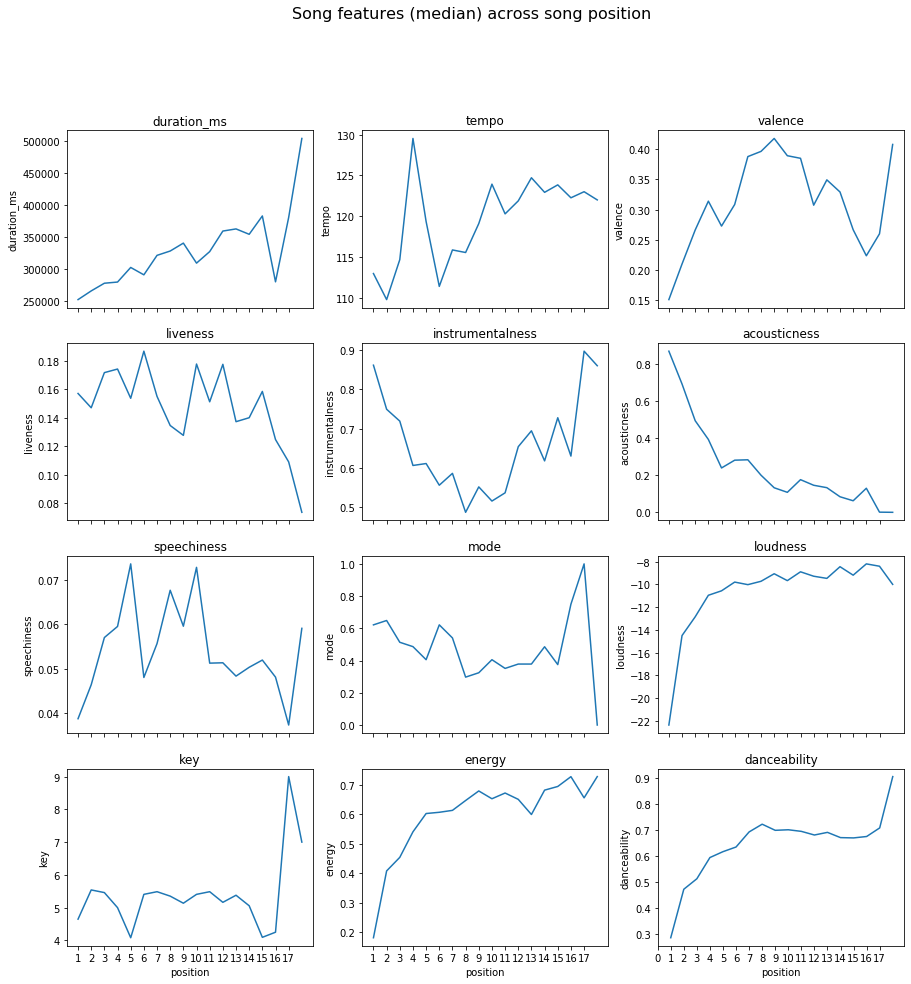

In [10]:
# Features
track_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Setup grid for subplots
f, axes = plt.subplots(4, 3, sharex=True, figsize=(15,15))

# Plot mean danceability and other song features over playlist positions
pl_position_df = songs_df.groupby(['position']).agg('mean').reset_index()

for i in range(4):
    for j in range(3):
        feat = track_features.pop()
        axes[i,j].set_title(feat)
        g = sns.relplot(x="position", y=feat, kind="line", data=pl_position_df, ax=axes[i, j]);
        g = (g.set_axis_labels("Playlist Position","Median "+ feat));
        axes[i, j].set_xticks(np.arange(0, 18, 1.0))
        
# Hacky way to get rid of empty plots
for i in range(2, 14):
    plt.close(i)

f.suptitle('Song features (median) across song position', fontsize=16, y=.995)
plt.show();

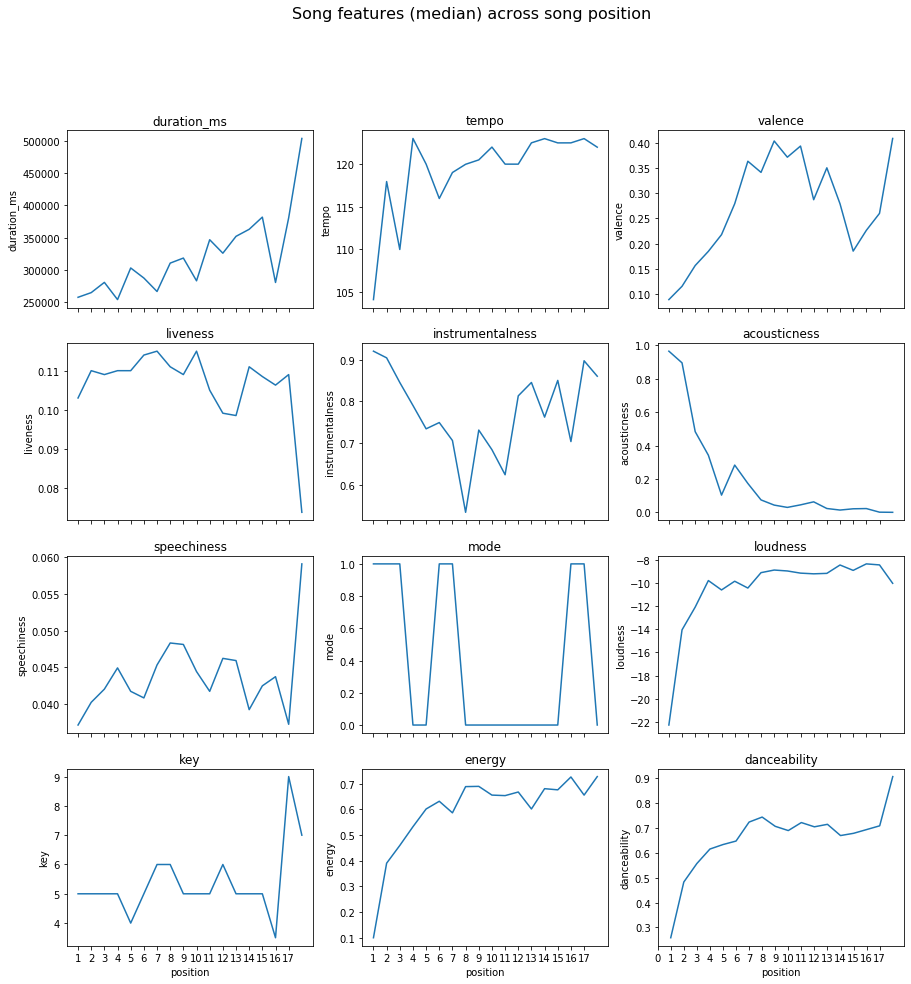

In [11]:
# Features
track_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Setup grid for subplots
f, axes = plt.subplots(4, 3, sharex=True, figsize=(15,15))

# Plot mean danceability and other song features over playlist positions
pl_position_df = songs_df.groupby(['position']).agg('median').reset_index()

for i in range(4):
    for j in range(3):
        feat = track_features.pop()
        axes[i,j].set_title(feat)
        g = sns.relplot(x="position", y=feat, kind="line", data=pl_position_df, ax=axes[i, j]);
        g = (g.set_axis_labels("Playlist Position","Median "+ feat));
        axes[i, j].set_xticks(np.arange(0, 18, 1.0))
        
# Hacky way to get rid of empty plots
for i in range(2, 14):
    plt.close(i)

f.suptitle('Song features (median) across song position', fontsize=16, y=.995)
plt.show();

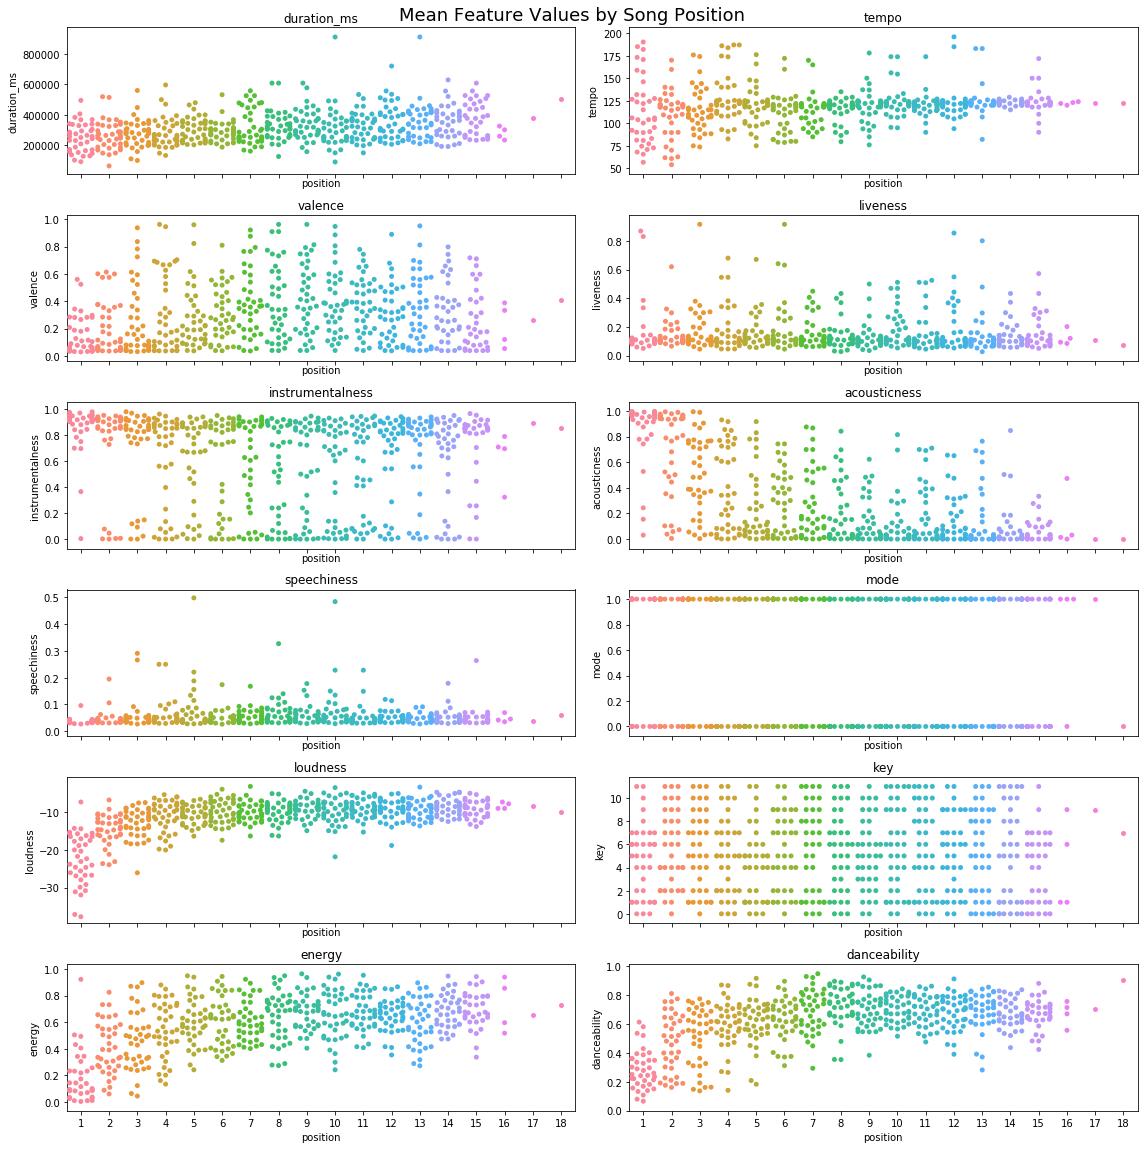

In [12]:
# Features
track_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Setup grid for subplots
f, axes = plt.subplots(6, 2, sharex=True, figsize=(16,16))

for i in range(6):
    for j in range(2):
        feat = track_features.pop()
        axes[i,j].set_title(feat)
        g = sns.swarmplot(x='position', y=feat, data=songs_df, ax=axes[i,j])
        axes[i, j].set_xticks(np.arange(0, 18, 1.0))

    f.suptitle('Mean Feature Values by Song Position', fontsize=18, y=.995)
plt.tight_layout()

plt.show();